# Line anagrams

###### Seen on Twitter, 1/25/18:

- Last updated 1/26/18 9:33am

In [1]:
# Imports

import os
import string
import re
import html  

from pprint import pprint

from cltk.corpus.latin import latinlibrary
from cltk.tokenize.line import LineTokenizer
from cltk.stem.latin.j_v import JVReplacer

In [2]:
# Setup CLTK tools

line_tokenizer = LineTokenizer('latin')
replacer = JVReplacer()

In [3]:
# Let's start with what we already know...
# There is at least one three-word hexameter in Horace's *Satires*

# So we get the two Satires files from the Latin Library...
files = latinlibrary.fileids()

In [4]:
# We need to get a list of hexameter poems in the Latin Library. This
# may be a good thing to automate in the future, but for now it is
# going to take a bit of knowledge of Latin poetry and some hard-coded
# filenames. I'll update this as I think of more, but I'll get it
# started with the basics. And I'll skip all of the hexameter lines
# from elegy for now, but they really should be included in the
# update as well.

# Basing the first pass on (Berstein, Gervias, Lin 2015) Table 1
# http://www.digitalhumanities.org/dhq/vol/9/3/000237/000237.html

lucretius = [file for file in files if 'lucr' in file]
vergil = [file for file in files if 'vergil/' in file]
horace = [file for file in files if 'horace/ars' in file]
horace += [file for file in files if 'horace/epi' in file]
horace += [file for file in files if 'horace/serm' in file]
ovid = [file for file in files if 'ovid.m' in file]
manilius = [file for file in files if 'manil' in file]
persius = [file for file in files if 'persius.txt' in file]
lucan = [file for file in files if 'lucan/' in file]
ilias = [file for file in files if 'ilias' in file]
statius = [file for file in files if 'statius/ac' in file]
statius += [file for file in files if 'statius/th' in file]
silius = [file for file in files if 'silius' in file]
valerius = [file for file in files if 'valer' in file]
juvenal = [file for file in files if 'juv' in file]
# juvencus -- Not in LL?
ausonius = [file for file in files if 'aus.mos' in file]
claudian = [file for file in files if 'claudian.pros' in file]
# other works of Claudian?
# corippus -- Not in LL?

hexameter_files = lucretius + vergil + horace + ovid + manilius \
                + persius + lucan + ilias + statius + silius \
                + valerius + juvenal + ausonius + claudian

In [5]:
# Preprocess texts

def preprocess(text):

    remove_list = [r'\bHorace: .+',
                   r'\bAppendix Vergiliana\b',
                   r'\bThe Miscellany\b',
                   r'\bThe Latin Library\b',
                   r'\bThe Classics Page',
                   r'\bThe Classics Homepage',
                   r'\bSermonum Liber .+\b',
                   r'\bVergil: Aeneid .+\b',
                   r'\bManilius, Liber .+\b',
                   r'\bMetamorposes\b',
                   r'\bLucan Liber .+',
                   r'\bStatius: Thebaid .+',
                   r'\bStatius: Achilleid .+',
                   r'\bValerius Flaccus: Liber .+',
                   r'\bSERMONVM Q. HORATI FLACCI LIBER .+?\b',
                   r'PVBLIVS PAPINIVS STATIVS',
                   r'Silius, Liber .+'
                  ]
    
    for pattern in remove_list:
        text = re.sub(pattern, '', text)
    
    text = html.unescape(text) # Handle html entities
    text = re.sub(r'&nbsp;?', ' ',text) #&nbsp; stripped incorrectly in corpus?
    text = re.sub(r'\x00',' ',text) #Another space problem?
    
    # Fix partial lines
    text = re.sub(r'\d+(a|b)', ' ', text)
        
    text = text.lower()
    text = replacer.replace(text) #Normalize u/v & i/j    
    
    punctuation ="\"#$%&\'()*+,-/:;<=>@[\]^_`{|}~.?!«»"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    text = re.sub('[ ]+',' ', text) # Remove double spaces
    text = re.sub('\s+\n+\s+','\n', text) # Remove double lines and trim spaces around new lines
    
    return text

In [6]:
# Preprocess files as above

hexameter_raw = [latinlibrary.raw(file) for file in hexameter_files]
hexameter_edit = [preprocess(raw) for raw in hexameter_raw] # need to preprocess LL paratexts
hexameter_lines = [line_tokenizer.tokenize(text) for text in hexameter_edit]

In [7]:
def alphabetize_tokens(word):
    word = ''.join(sorted(word))
    return word

def alphabetize_tokens_line(line):
    line_tokens = line.split()
    return [alphabetize_tokens(token) for token in line_tokens]

def check_anagram(tokens):
    return len(tokens) != len(set(tokens))

In [8]:
count = 0

for work in hexameter_lines:
    for line in work:
        line_mod = line.split()
        line_mod = set(line_mod)
        line_mod = [token for token in line_mod if len(token) >= 5]
        line_mod = " ".join(line_mod)
        if check_anagram(alphabetize_tokens_line(line_mod)):
            count += 1
            print(line)
    
print(count)

serpentis cauda procero corpore utrumque 
ne quiquam quoniam tu animo tamen omnia possis 
omnia praecepi atque animo mecum ante peregi 
pulsa palus 
maxima pars uatum pater et iuuenes patre digni 
ad talos stola demissa et circumdata palla 
cumque animo et uigili perspexerat omnia cura 
deseruit patrios idaque altrice relicta 
ut primum soceri data copia dextera dextrae 
uiuacisque iecur cerui quibus insuper addit 
haesit et ad cautes adducto fune secuta est 
nymphaeumque tenent nudas aquilonibus undas 
inuidia sacrae caesar ne tangere famae 
collatusque haeret pede pes et dextera dextrae 
prima per attonitas nigrae regina cateruae
dicta dies aderat cadit ingens rite tonanti 
sera quidem manet ira tamen sic fatus et arces 
desertam ductore ratem bonus ille per artem 
pinifero fractaeque ruunt super agmina rupes 
saeua ma gis thalamos excussaque uincla quod ausae 
arbitrio manet illa tamen iactura nec umquam 
21


In [9]:
length_range = range(2,11)

counts = []

for i in length_range:
    temp = 0
    for work in hexameter_lines:
        for line in work:
            line_mod = line.split()
            line_mod = [token for token in line_mod if len(token) == i]
            line_mod = sorted(set(line_mod))
            line_mod = " ".join(line_mod)
            if check_anagram(alphabetize_tokens_line(line_mod)):
                temp += 1
                print('%s\n%s\n' % (line_mod,line))
    counts.append(temp)

print(counts)

es tu ut
tu quidem ut es leto sopitus sic eris aeui 

et te
nec te fallit item quid corporis auferat et quid 

in ni
ni mirum quia sunt gallorum in corpore quaedam 

in ni
ni mirum quia sunt in aqua permulta uaporis 

et te
exigat et pulchra faciat te prole parentem

et te
perge modo et qua te ducit uia dirige gressum

et te
sin absumpta salus et te pater optime teucrum 

ad et te
ad te confugio et supplex tua numina posco 

et si te
et te si qua uiam dederit fortuna latino 

ad et te
nunc ad te et tua magna pater consulta reuertor 

et te
fidis equo dimitte fugam et te comminus aequo 

et te
sis memor et te animo repetentem exempla tuorum 

et ni te
ni te tantus edit tacitam dolor et mihi curae 

et te
quod te per superos et conscia numina ueri 

et te
nusquam abero et tutum patrio te limine sistam 

et te
testor cara deos et te germana tuumque 

et te
iamdudum et frustra cerno te tendere contra 

et te
et te lapsorum miseret quae munera niso 

et te ut
quin ut te supplex peterem et t

et te
diuidit et iam te tua gaudia uirgo relinquunt 

et te
te quoque et aeaeos iubeas mitescere campos 

et te
atque hunc te meminisse uelis et nostra fateri 

et te
nec queror et pro te lucem quoque laeta relinquam 

et te
credis et ulla peti sine te loca redde tyranno 

et si te
si non et genitor te primam amplectitur aeson 

et in te
et quis in aeolio maneat te uellere custos 

et te
sidera et haec te meque uident tecum aequora tecum 

et te
nomine te uenti procul et tua fata ferebant

et te
reddidit aesonides et te fidissime rector 

tu ut
tu miser exclamas ut stentora uincere possis 

et in te
te uidet in somnis tua sacra et maior imago 

et te
mentis causa malae tamen est et origo penes te 

et te
et te contempto rapitur metisque relictis 

et te
donauit terris elemento gratulor et te 

at tu ut
ut semel aut iterum super illam palpitet at tu 

et te
nam quid agas cum te furiosus cogat et idem 

et te
adnuit ergo uale nostri memor et quotiens te 

et ne te
et ne te teneam romanor

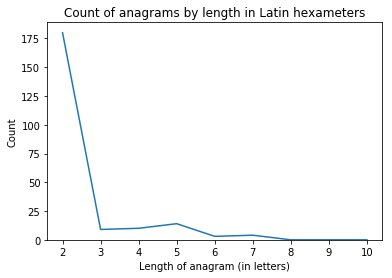

In [10]:
lengths = list(length_range)

import matplotlib.pyplot as plt
plt.plot(lengths,counts)
plt.title('Count of anagrams by length in Latin hexameters')
plt.ylabel('Count')
plt.xlabel('Length of anagram (in letters)')
plt.ylim(0)
plt.show()